### Objetivos dessa Análise

- Ver a Distribuição de variáveis
- Correlação entre variáveis
- Resumo estatístico da análise

# 1. Preparando o Ambiente e os Dados

Primeiro importei algumas bibliotecas básicas para análise que irei usar nesse dataframe

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Aqui carreguei o dataFrame e usei o .head() para ver superficialmente como o ele está

In [8]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Padronizei os nomes das colunas deixando tudo **minusculo**, **sem espaços iniciais ou finais**, **substitui espaços e barras entre palavras para traços**. Além de renomear 2 colunas para melhor visualização

In [9]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('/','_')
df = df.rename(columns={
    'parental_level_of_education': 'parental_education',
    'test_preparation_course': 'test_preparation'
})
df.head()

,gender,race_ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 2. Inspeção inicial

Nessa etapa descubro algumas informações valiosas e as represento em graficos para melhor analise

In [10]:
df.shape

(1000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race_ethnicity      1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_preparation    1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental_education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_preparation,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading_score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing_score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Informações que retiro do .describe():
- o dataFrame não possui valores ausentes
- Gênero está equilibrado mas a maioria não faz curso preparatorio (test_preparation)
- Possui uma variação moderada entre as notas
- Existe Outliers (0 e 100)
- Media geral dos alunos está em torno de 67-68
- Materia com melhor desempenho é Reading
- Materia com pior desempenho é Math

# 3. Limpeza Básica

Como o dataFrame não apresenta valores nulos, dispensarei o tratamento deles.

Realizei essa ultima verificação para ter certeza que não existem nulos no dataframe

In [13]:
for col in df.select_dtypes(include='object').columns:
    print('\n', col)
    print(df[col].value_counts(dropna=False))


 gender
gender
female    518
male      482
Name: count, dtype: int64

 race_ethnicity
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

 parental_education
parental_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

 lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

 test_preparation
test_preparation
none         642
completed    358
Name: count, dtype: int64


Aqui realizei uma limpeza simples nos valores, **removendo espaços iniciais e finais e padronizando strings**. Além de transformar os nomes das colunas em **valores categóricos** para facilitar a análise.

In [14]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

for col in ['gender', 'race_ethnicity', 'parental_education', 'lunch', 'test_preparation']:
    df[col] = df[col].astype('category')

# 4. Análise Exploratória - Gráficos

### Análise univariada numérica

In [15]:
score_cols = ['math_score','reading_score','writing_score']
df[score_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Histograma Notas por Matéria

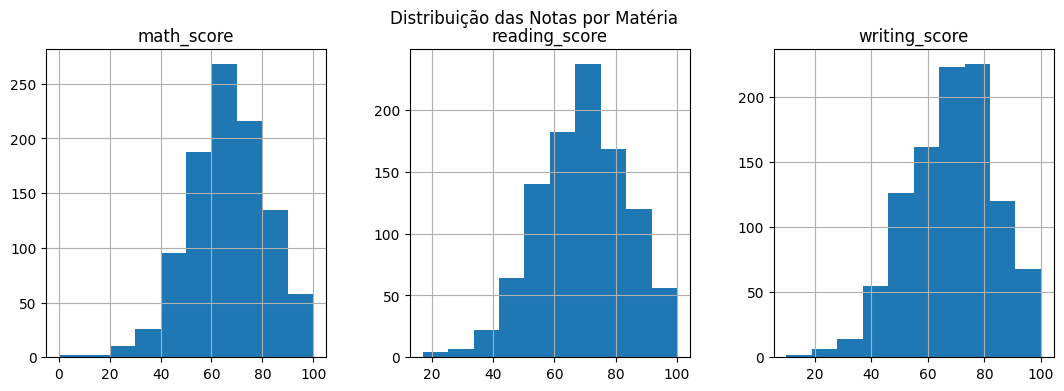

In [16]:
score_cols = ['math_score', 'reading_score', 'writing_score']

df[score_cols].hist(layout=(1,3), figsize=(13, 4))
plt.suptitle('Distribuição das Notas por Matéria')
plt.show()

Visualização melhor das notas dos alunos, e ver se existe algum padrão que na media que ainda não vimos.
- As medianas das 3 materias são aproximadas (65-70) indicando que não há matéria discrepante no desempenho médio
- Distribuição de Reading E Writing é parecida

### Análise univariada categórica

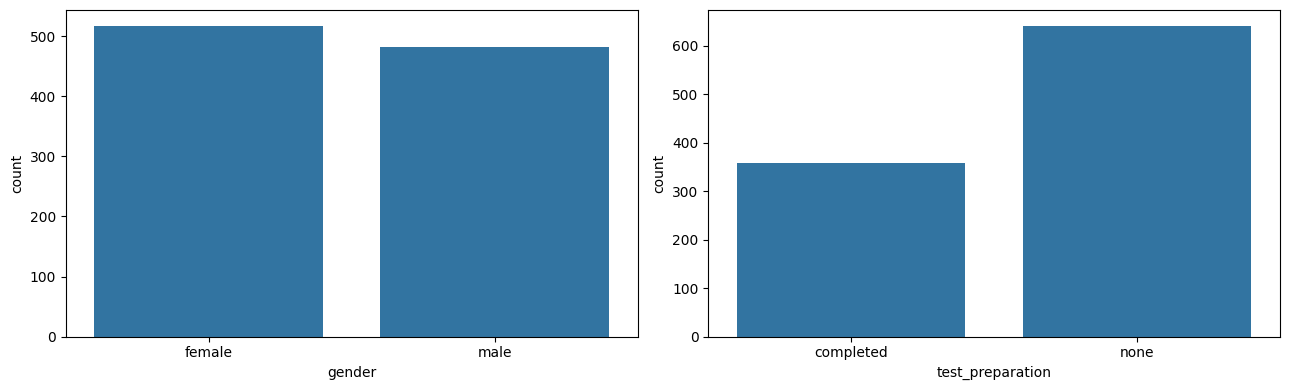

In [49]:
fig, axes = plt.subplots(1,2, figsize=(13,4))
sns.countplot(data=df, x='gender', ax=axes[0])
sns.countplot(data=df, x='test_preparation', ax=axes[1])
plt.tight_layout()
plt.show()

Nessa parte analisamos um pouco da turma em si, onde meninas são predominantes e que apenas uma pequena porcentagem da sala fez o teste preparatório (sem: 645, com: 355) -> número que soube na verificação na parte 3 onde faço uma pequena limpeza e verificação nos dados

### Boxplot de Notas

In [19]:
def iqr_outliers(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k*iqr
    upper = q3 + k*iqr
    return ((series < lower) | (series > upper))

for c in score_cols:
    mask = iqr_outliers(df[c])
    print(c, 'outliers:', mask.sum(), '({:.1f}%)'.format(100*mask.mean()))

math_score outliers: 8 (0.8%)
reading_score outliers: 6 (0.6%)
writing_score outliers: 5 (0.5%)


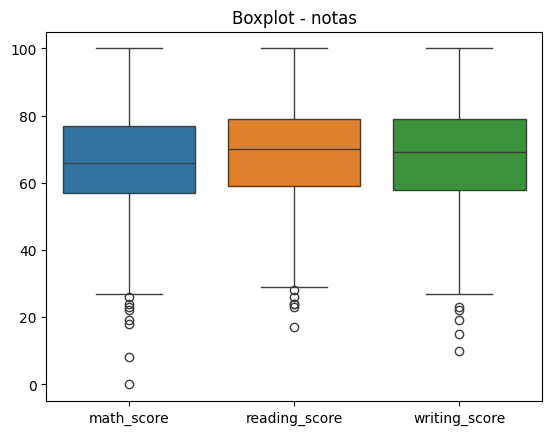

In [20]:
sns.boxplot(data=df[score_cols])
plt.title('Boxplot - notas')
plt.show()

### Heatmap de Correlação

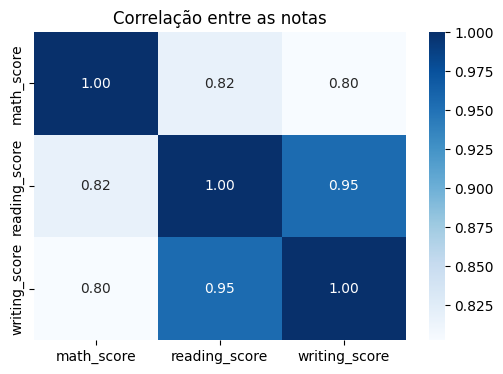

In [21]:
plt.figure(figsize=(6,4))
corr = df[score_cols].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlação entre as notas")
plt.show()

Interpretação do Grafico:
- Há uma correlação positiva forte entre Writing e Reading (0.95), já que quem lê bem tende a escrever bem também
- Matemática tem uma correlação boa com Reading apesar de ser menos (0.82), o que talvez indique que o desempenho está relacionado a outras materias

### Grafico de Dispersão

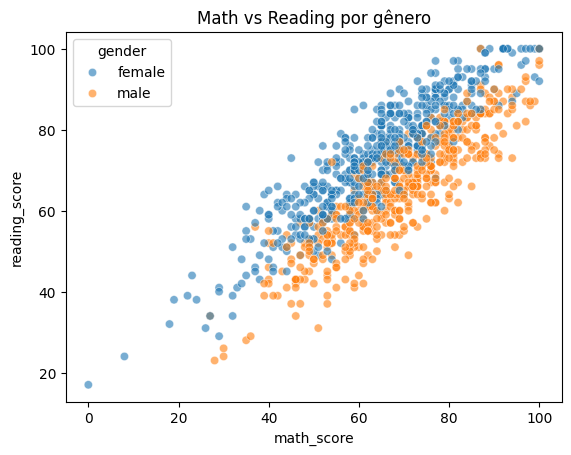

In [24]:
sns.scatterplot(data=df, x='math_score', y='reading_score', hue='gender', alpha=0.6)
plt.title('Math vs Reading por gênero')
plt.show()

Nesse grafico é possivel ver que as notas estão **super** relacionadas.

Matematica e Leitura foram botadas para a dispersão e meninos e meninas mostram quanto tiraram nas materias, o resultado é uma linha **crescente positiva**. O que além de afirmar que quem vai mal em uma materia, também vai mal em outra.

No grafico também mostra que os meninos tem uma nota menor em reading do que em matematica, pode estar diretamente ligado a incentivo ou interesse, mas não tem como afirmar sem informações adicionais. Enquanto as meninas tem uma nota maior em reading do que em matematica.


## Análise - Gênero e Preparação por Notas

### Barplot de gênero por médias

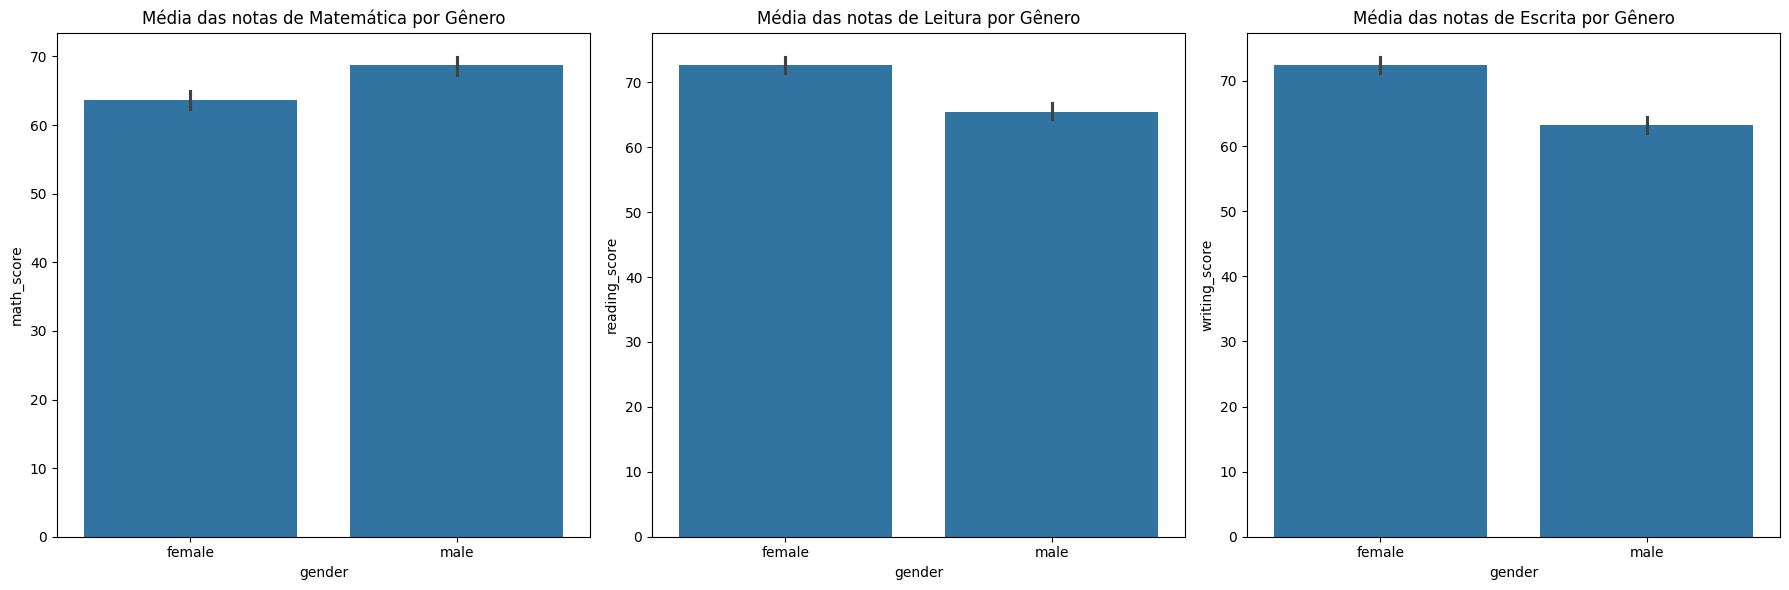

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.barplot(x="gender", y="math_score", data=df, estimator=np.mean, ax=axes[0])
axes[0].set_title("Média das notas de Matemática por Gênero")

sns.barplot(x="gender", y="reading_score", data=df, estimator=np.mean, ax=axes[1])
axes[1].set_title("Média das notas de Leitura por Gênero")

sns.barplot(x="gender", y="writing_score", data=df, estimator=np.mean, ax=axes[2])
axes[2].set_title("Média das notas de Escrita por Gênero")

plt.tight_layout()
plt.show()

### Boxplot - Gênero por nota na Distribuição

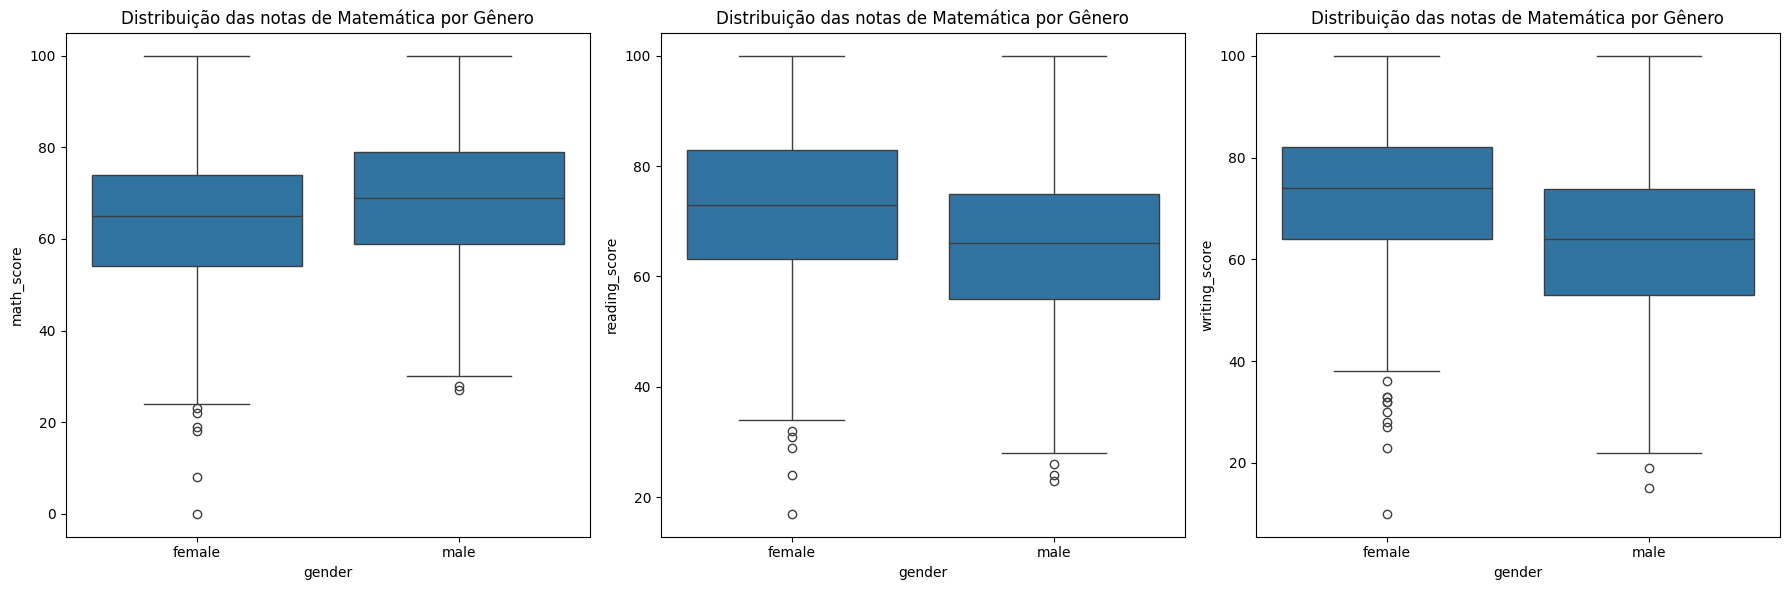

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(x="gender", y="math_score", data=df, ax=axes[0])
axes[0].set_title("Distribuição das notas de Matemática por Gênero")

sns.boxplot(x="gender", y="reading_score", data=df, ax=axes[1])
axes[1].set_title("Distribuição das notas de Leitura por Gênero")

sns.boxplot(x="gender", y="writing_score", data=df, ax=axes[2])
axes[2].set_title("Distribuição das notas de Escrita por Gênero")

plt.tight_layout()
plt.show()

Os gráficos **Barplot** e **Boxplot** revelaram que as meninas tem uma nota inferior a dos meninos em matemática, mas em writing e Reading as meninas tem uma nota maior.

Apesar disso, a maior parte dos outliers estão relacionados as **garotas**, sendo 2 ou 3 dos meninos em cada matéria.

### Barplot de preparação por médias

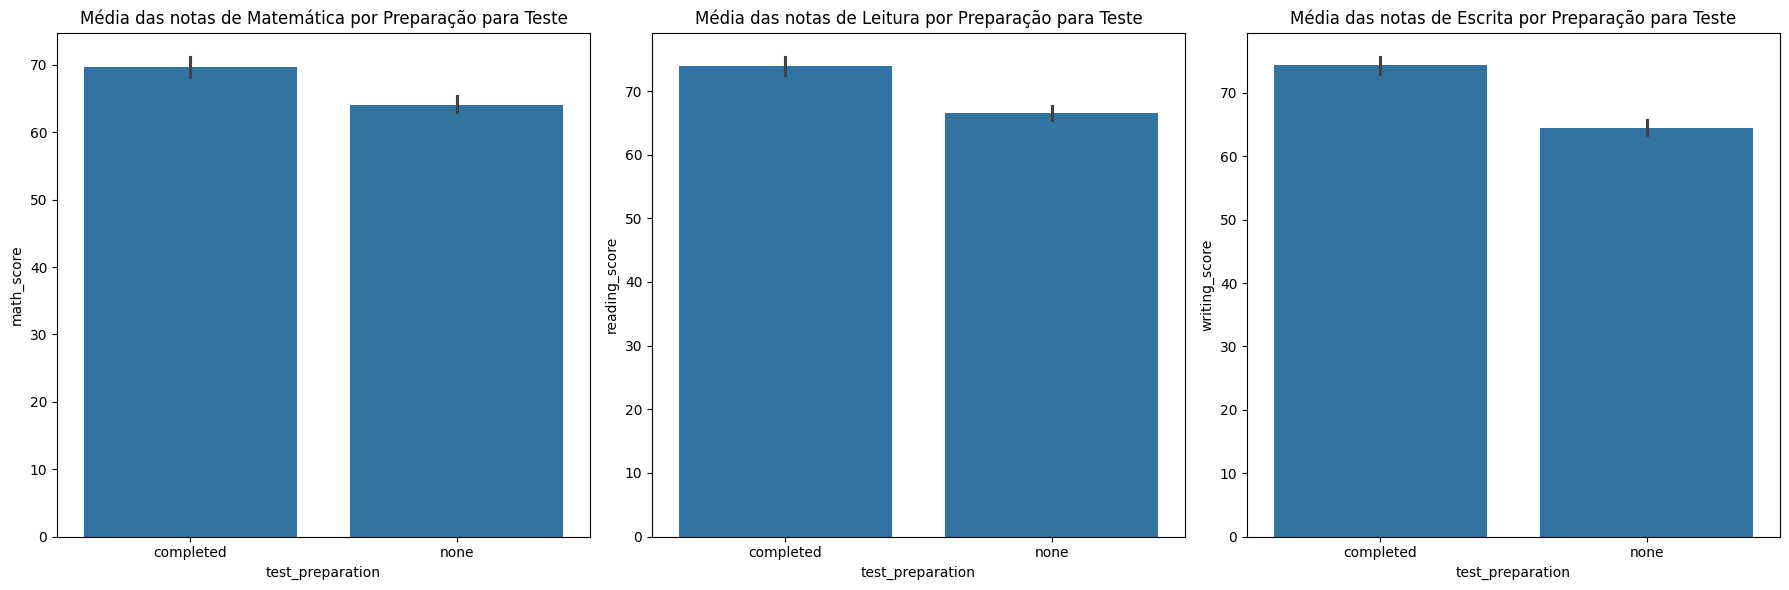

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.barplot(x="test_preparation", y="math_score", data=df, estimator=np.mean, ax=axes[0])
axes[0].set_title("Média das notas de Matemática por Preparação para Teste")

sns.barplot(x="test_preparation", y="reading_score", data=df, estimator=np.mean, ax=axes[1])
axes[1].set_title("Média das notas de Leitura por Preparação para Teste")

sns.barplot(x="test_preparation", y="writing_score", data=df, estimator=np.mean, ax=axes[2])
axes[2].set_title("Média das notas de Escrita por Preparação para Teste")

plt.tight_layout()
plt.show()

### Boxplot - Preparação por nota na Distribuição

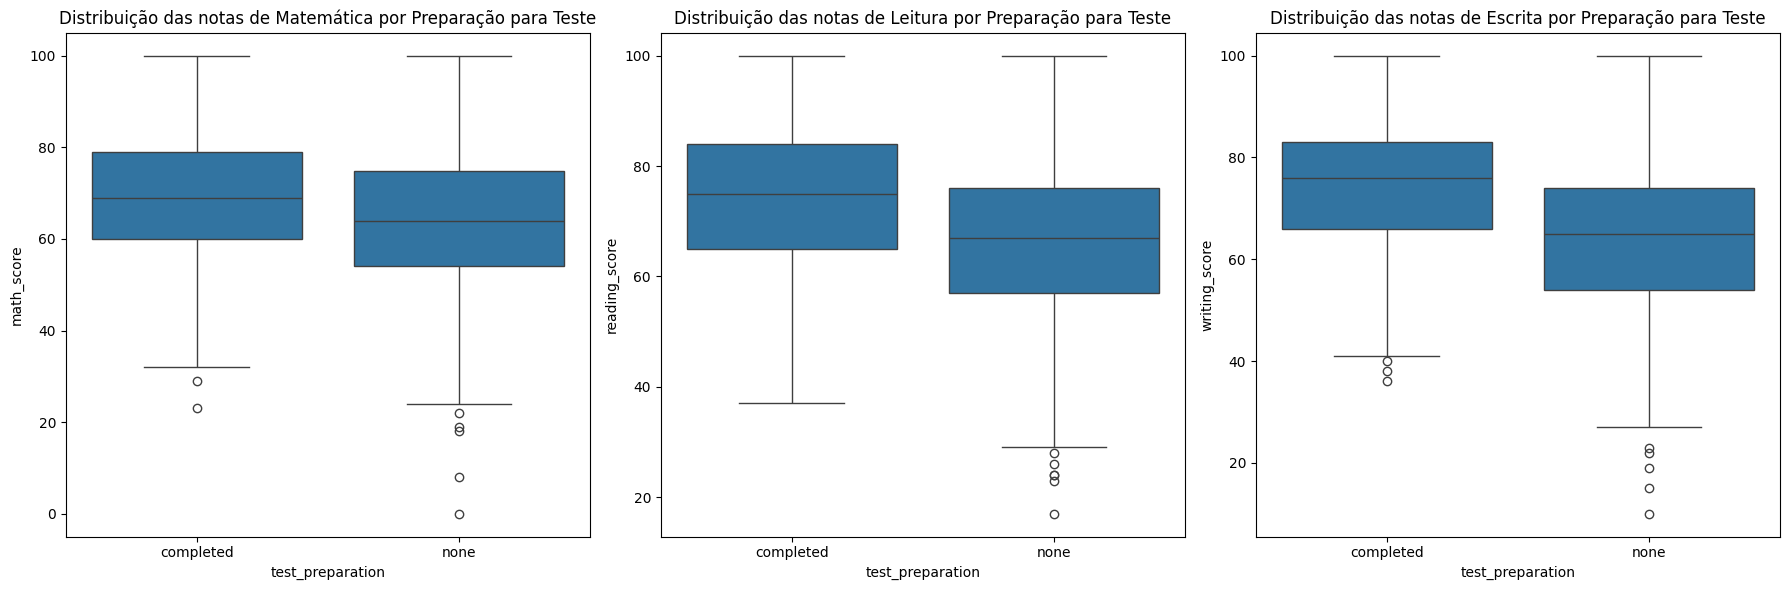

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.boxplot(x="test_preparation", y="math_score", data=df, ax=axes[0])
axes[0].set_title("Distribuição das notas de Matemática por Preparação para Teste")

sns.boxplot(x="test_preparation", y="reading_score", data=df, ax=axes[1])
axes[1].set_title("Distribuição das notas de Leitura por Preparação para Teste")

sns.boxplot(x="test_preparation", y="writing_score", data=df, ax=axes[2])
axes[2].set_title("Distribuição das notas de Escrita por Preparação para Teste")

plt.tight_layout()
plt.show()

Os gráficos **Barplot** e **Boxplot** comprovam que as maiores notas em todas as matérias vem de alunos com preparação antes do teste, sendo os gráficos de todas as matérias muito similares.

E em relação dos Outliers, muitos deles estão concentrados nos que não tem o preparamento, apesar de ainda existir 2 ou 3 nos que tem preparação completa. Vale comentar que em Reading a quem tem preparação, não temos nenhum outliers.

# 5. Conclusão

**A análise que realizei mostrou que o desempenho dos alunos apresentam alguns padrões claros:**

*   Meninas têm desempenho superior em leitura e escrita, enquanto meninos se destacam levemente em matemática.
*   A preparação antes do teste tem impacto positivo em todas as matérias, reduzindo inclusive a ocorrência de outliers em leitura.
*   As matérias estão fortemente correlacionadas, especialmente leitura e escrita, o que sugere que melhorias em uma podem refletir diretamente na outra.


Em suma, o estudo indica que há **diferenças de desempenho entre os gêneros**: meninas tendem a se destacar em leitura e escrita, enquanto meninos apresentam desempenho levemente superior em matemática.

Já a preparação antes do teste mostram um **impacto claro** em todas as disciplinas, reduzindo até a ocorrência de outliers.
Além disso, as disciplinas apresentam **forte correlação** entre si, o que sugere que avanços em uma área podem refletir em outras.